In [26]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # to draw a classification tree
from random import randrange
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [27]:
df = pd.read_csv('ricsBigData.csv')#load Dataset

if(df.columns[0]=='Unnamed: 0'):
    
    df=df.iloc[:,1:]#only use the feature and Label Colloums 
df_collumns=df.columns
df.dtypes


Rel_BreitGross     float64
RelSpitze_oben     float64
RelSpitze_unten    float64
Anzahl_Linie         int64
Anzahl_Ecken         int64
Anzahl_Kreis         int64
Label                int64
dtype: object

In [28]:
df.head()

,Rel_BreitGross,RelSpitze_oben,RelSpitze_unten,Anzahl_Linie,Anzahl_Ecken,Anzahl_Kreis,Label
0,0.291153,0.009050,0.651584,9,2,0,0
1,0.338341,0.556122,0.750000,10,5,0,0
2,0.726178,0.985294,0.989496,6,8,0,0
3,0.316422,0.738397,0.616034,27,15,0,0
4,0.260098,0.175510,0.640816,15,8,0,0


<AxesSubplot:>

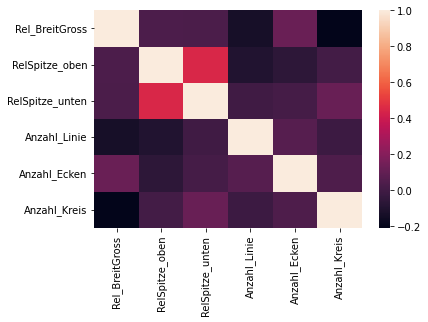

In [20]:

corr = df.iloc[:,:-1].corr()
sns.heatmap(corr)

In [21]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train, X_test, y_train,y_test = train_test_split( X,y, test_size = 0.6, random_state=41)



In [22]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(max_depth=10, random_state = 42)
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

c:\Users\jonas\Documents\08_Master\Python_Projekte\Verfahren_der_KI\KIProjekt\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


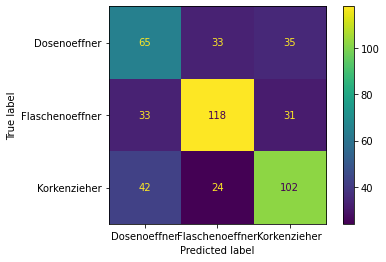

In [23]:
plot_confusion_matrix(Classifier, X_test, y_test, display_labels=["Dosenoeffner", "Flaschenoeffner","Korkenzieher"])

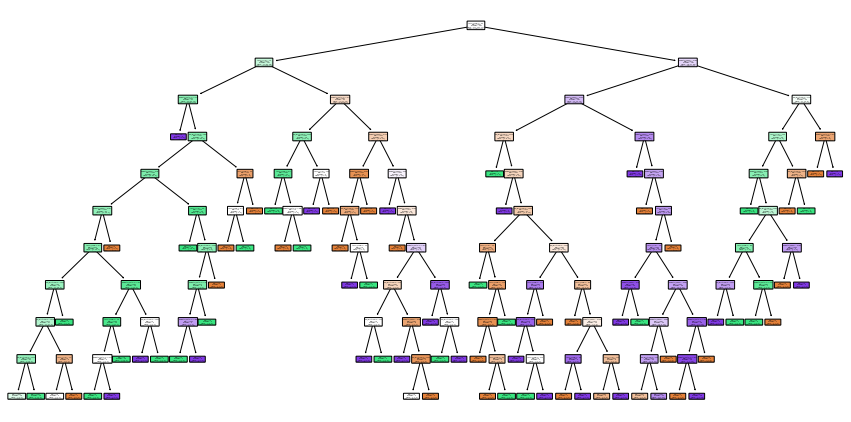

In [29]:
plt.figure(figsize=(15, 7.5))
plot_tree(Classifier, 
          filled=True, 
          rounded=True, 
          class_names=["Dosenoeffner", "Falschenoeffner", "Korkenzieher"], 
          feature_names=df_collumns); 

In [24]:
y_pred = Classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5900621118012422

In [25]:
#TODO Hier taucht manchmal ein Fehler auf nochmal anschauen 
value=randrange(len(X_test))
X_single_test = X_test.iloc[[value-1]]
print("Features for sample:",value,"\n\n",X_single_test)

Y_single_pred= Classifier.predict(X_single_test)

print("Predicited Lable for sample:",value," ",Y_single_pred)
print("Correct Label for sample:",value," ",y_test[value])





Features for sample: 435 

      Rel_BreitGross  RelSpitze_oben  RelSpitze_unten  Anzahl_Linie  \
759        0.266362        0.820652         0.755435             2   

     Anzahl_Ecken  Anzahl_Kreis  
759             5             0  
Predicited Lable for sample: 435   [1]
Correct Label for sample: 435   1
